In [53]:
import pandas as pd
# 所有的路线！
ods_july_0724 = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\k_top_router_0902.csv')


In [24]:
# 统计每个路线对的频次信息
# each_group_ = ods_july_0724.groupby(['cl_cfa_geohash_short', 'cl_dd_geohash_short'])['zke_lch_jyqk'].describe()

In [2]:

each_group_ = pd.read_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs.csv")



In [54]:
# 统计频次信息，生成频次dataframe 单行是每个路线对的历次公里数
# ods_july_0724 = ods_july_0724[ods_july_0724['zke_lch_jyqk'] > 3]

# each_group_all_distance = ods_july_0724[ods_july_0724['zke_lch_jyqk'] > 3].groupby(['cl_cfa_geohash_short', 'cl_dd_geohash_short'])['zke_lch_jyqk']
each_group_all_distance = ods_july_0724[ods_july_0724['zke_lch_jyqk'] > 3].groupby('pair_name')['zke_lch_jyqk']
# each_group_all_distance_reverse = ods_july_0724[ods_july_0724['zke_lch_jyqk'] > 3].groupby(['cl_dd_geohash_short', 'cl_cfa_geohash_short'])['zke_lch_jyqk']




            #cur_cnt += 1
        
# 对调出发、结束点(从而合并 A-B与B-A)
# for key, value in each_group_all_distance_reverse:
#     if key in each_group_limit.keys():        
#         each_group_limit[key].extend(value.to_list())
#         cur_cnt += 1
#     else:
#         if len(value) > threshold:
#             each_group_limit[key] = value.to_list()


In [60]:
# for key, values in each_group_all_distance:
#     print(key, values)
#     print(len(each_group_all_distance.groups))
#     break

wthqgb_wthqs7 3984226    12.8
3984227     5.4
Name: zke_lch_jyqk, dtype: float64
563063


In [61]:
each_group_all_distance_desc = each_group_all_distance.describe()

In [63]:
each_group_all_distance_desc_sort = each_group_all_distance_desc.sort_values('count', ascending=False)
print(each_group_all_distance_desc_sort)

                count       mean       std    min    25%     50%     75%  \
pair_name                                                                  
wtmscx_wtmt15  2400.0   4.073942  0.668451   3.03   3.60   3.945   4.340   
wtms7j_wtmse9  2213.0   3.875308  0.797457   3.01   3.44   3.630   4.190   
wtm7xp_wtm7zc  2171.0   4.269314  0.680579   3.04   3.80   4.180   4.610   
wtmk68_wtmk72  2023.0   4.241725  1.718908   3.01   3.65   4.200   4.565   
wtms6j_wtms7j  1952.0   5.127022  0.896871   3.01   4.68   5.025   5.400   
...               ...        ...       ...    ...    ...     ...     ...   
wtmkpr_wtm6cw     1.0  44.300000       NaN  44.30  44.30  44.300  44.300   
wtmkpr_wtm6fn     1.0  40.670000       NaN  40.67  40.67  40.670  40.670   
wtmkpr_wtm712     1.0  45.370000       NaN  45.37  45.37  45.370  45.370   
wtmdb7_wtmd89     1.0   9.100000       NaN   9.10   9.10   9.100   9.100   
wttju4_wtmkq2     1.0  21.300000       NaN  21.30  21.30  21.300  21.300   

           

In [ ]:
each_group_all_distance_desc_sort["upper_thresh"] = 2.5*(each_group_all_distance_desc_sort["75%"]) - 1.5 * each_group_all_distance_desc_sort["25%"]

In [ ]:
each_group_all_distance_desc_sort.to_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist_describe_with_thresh_0903.csv')

In [11]:
threshold = 0

each_group_limit = {}

cur_cnt = 0

i = 0

ods_july_0724["pairs"] = ""
# # print(list(each_group_all_distance))
for key, value in each_group_all_distance:

    key_reverse = (key[1], key[0])
    if key_reverse in each_group_limit.keys():
        #对调出发、结束点(从而合并 A-B与B-A) 保证不会重复计算 
        each_group_limit[key] = str(key_reverse[0]) + "_" + str(key_reverse[1]) # .extend(value.to_list())
        # continue
    else:
        # if len(value) > threshold:
        each_group_limit[key] = str(key[0]) + "_" + str(key[1])# 1 # value.to_list()



    # if key_reverse in each_group_limit.keys():
    #     #对调出发、结束点(从而合并 A-B与B-A) 保证不会重复计算 
    #     # each_group_limit[key] = str(key_reverse) # .extend(value.to_list())
        
    #     # continue
    # else:
    #     # if len(value) > threshold:
    #     each_group_limit[key] = str(key)# 1 # value.to_list()

In [12]:
hash_table = pd.DataFrame.from_dict(each_group_limit, orient='index')

In [45]:
for i, r in hash_table.iterrows():
    print(i)
    break

hash_table.rename(columns={0:'pair_name', 1:'pair_str'}, inplace=True)


list_name = hash_table.index.values

list_name_from, list_name_to = [], []
for i in list_name:
    list_name_from.append(i[0])
    list_name_to.append(i[1])

hash_table["from"] = list_name_from
hash_table["to"] = list_name_to

('wthqgb', 'wthqs7')


In [51]:
print(hash_table)

                      pair_name    from      to
(wthqgb, wthqs7)  wthqgb_wthqs7  wthqgb  wthqs7
(wthqs7, wthqse)  wthqs7_wthqse  wthqs7  wthqse
(wthqu0, wthqsp)  wthqu0_wthqsp  wthqu0  wthqsp
(wthreg, wtkc0m)  wthreg_wtkc0m  wthreg  wtkc0m
(wthrfb, wtk8rn)  wthrfb_wtk8rn  wthrfb  wtk8rn
...                         ...     ...     ...
(wtted3, wtmeux)  wtted3_wtmeux  wtted3  wtmeux
(wttf1j, wtmsh8)  wttf1j_wtmsh8  wttf1j  wtmsh8
(wttf6v, wtmkr6)  wttf6v_wtmkr6  wttf6v  wtmkr6
(wttfx8, wtmkrd)  wttfx8_wtmkrd  wttfx8  wtmkrd
(wttju4, wtmkq2)  wttju4_wtmkq2  wttju4  wtmkq2

[813577 rows x 3 columns]


In [47]:
hash_table.to_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_hash.csv")

In [96]:
i = 0
for key, value in each_group_all_distance:
    # if key_reverse in each_group_limit:
    ods_july_0724.loc[each_group_all_distance.get_group(key).index, 'pairs'] = each_group_limit[key] # str(key_reverse)
    i += 1
    if i % 1000 == 999:
        print(i)
    # else:
    #     each_group_limit[key] = key
    #     ods_july_0724.loc[each_group_all_distance.get_group(key).index, ('pairs')] = str(key)
 


3799287    ('wthqgb', 'wthqs7')
3799288    ('wthqgb', 'wthqs7')
Name: pairs, dtype: object


In [88]:
print(ods_july_0724["pairs"])

0           
1           
2           
3           
4           
          ..
8118203     
8118204     
8118205     
8118206     
8118207     
Name: pairs, Length: 5793426, dtype: object


In [49]:
print(len(each_group_limit.keys()))

813577


In [16]:
print(ods_july_0724.columns)

Index(['did_bh', 'stastics_date', 'shch_rqsj', 'cl_cfa_dqjd', 'cl_cfa_dqwd',
       'cl_cfa_geohash', 'cl_dd_dqjd', 'cl_dd_dqwd', 'cl_dd_geohash',
       'zke_lch_jyqk', 'cl_cfa_geohash_short', 'cl_dd_geohash_short',
       'total_sum'],
      dtype='object')


In [31]:
pairs_name_list = list(each_group_limit.keys())

print(type(pairs_name_list[0]))


<class 'tuple'>


In [50]:
ods_july_0724["pairs"] = ""
for i, r in ods_july_0724.iterrows():
    
    pairs_name = (r['cl_cfa_geohash_short'], r['cl_dd_geohash_short'])# f"('{r['cl_cfa_geohash_short']}', '{r['cl_dd_geohash_short']}')"

    ods_july_0724.loc[i, ('pairs')] = each_group_limit[pairs_name]    
    # if pairs_name in pairs_name_list:
    #     ods_july_0724.loc[i, ('pairs')] = each_group_limit[pairs_name] # str(pairs_name)
    # else:
    #     pairs_name_reverse = (r['cl_dd_geohash_short'], r['cl_cfa_geohash_short']) # f"('{r['cl_dd_geohash_short']}', '{r['cl_cfa_geohash_short']}')"
    #     if pairs_name_reverse in pairs_name_list:
    #         ods_july_0724.loc[i, ('pairs')] = each_group_limit[pairs_name] # str(pairs_name)
    #     else:
    #         pass # break
            # print(i, "not find")
            # print(pairs_name)
            # print(pairs_name_reverse)
    if i % 10000 == 9999:
        print(i)
    # if i > 10:
    #     break


KeyboardInterrupt: 

In [35]:
print(ods_july_0724.loc[0:10, ('pairs')])

0     ('wtms6m', 'wtmsd6')
1     ('wtms6m', 'wtmsd6')
2     ('wtms6m', 'wtmsd6')
3     ('wtms6m', 'wtmsd6')
4     ('wtms6m', 'wtmsd6')
5     ('wtms6m', 'wtmsd6')
6     ('wtms6m', 'wtmsd6')
7     ('wtms6m', 'wtmsd6')
8     ('wtms6m', 'wtmsd6')
9     ('wtms6m', 'wtmsd6')
10    ('wtms6m', 'wtmsd6')
Name: pairs, dtype: object


In [23]:
print(len(list(each_group_limit.keys())))

print(each_group_limit[('wthqgb', 'wthqs7')])

563063
[12.8, 5.4]


In [24]:
# print(len(each_group_limit))

# # 去重
# each_group_limit_ = each_group_limit
# cur_list = list(each_group_limit_.keys())
# i = 0
# j = 0
# while i < len(cur_list):
#     key = cur_list[i]
#     # 反过来的如果也在其中，求删掉
#     tuple_reverse = (key[1], key[0])
#     if tuple_reverse in each_group_limit_:
#         del each_group_limit_[tuple_reverse]
#         # print(tuple_reverse) 
#         try:
#             cur_list.remove(tuple_reverse)
#         except:
#             pass
#         try:
#             cur_list.remove(key)
#         except:
#             pass
#     else:
#         i += 1
        
#     # print(i, key, len(cur_list))
#     j += 1
#     if j % 1000 == 999:
#         print(j, i , len(cur_list))
#         # break



In [ ]:
##保存文件
with open(fileName,"wb") as csv_file:
	writer=csv.writer(csv_file)
	for key,value in saveDict.items:
		writer.writerow([key,value])

##读取文件
readDict={}
with open(fileName,"rb") as csv_file:
	reader=csv.reader(csv_file):
	readDict=dict(reader)

In [25]:
df_final_data = pd.DataFrame.from_dict(each_group_limit, orient='index')
# print(df_final_data)



In [2]:
import pandas as pd
df_final_data = pd.read_csv(r"C:\Users\zhengqiushi\Desktop\hik\21-08-23\data\all_pairs_with_dist.csv")

In [26]:
 df_final_data['cnt'] = df_final_data.isnull().sum(axis=1)

In [27]:
df_final_data = df_final_data.sort_values('cnt')

In [1]:
print(df_final_data)


# df_final_data.to_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist.csv")

NameError: name 'df_final_data' is not defined

In [4]:
# df_test = df_final_data.iloc[0: 5, : ]
# print(df_final_data)
# df_final_data.drop(['cnt'], axis= 1)
# df_test_T= df_test.T
# print(df_test_T)

# for i in range(0, 10):
#     print(df_final_data.iloc[i, :].describe())
# df_test_des = df_test.T.describe()

# print(df_test_des)
# for i in range(0, 10):  .drop(['cnt'], axis= 1) 
df_final_data.drop(['cnt'], axis= 1).T.describe().T.to_csv(f"C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist_desc_{i}.csv")
print("???")

MemoryError: Unable to allocate 10.1 GiB for an array with shape (2401, 563063) and data type object

In [143]:
df_save = df_test_des.iloc[0: 9, :]
print(df_save)
df_save.to_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist_describe.csv")

       (wtmt15, wtmscx)  (wtms7j, wtmse9)  (wtm7xp, wtm7zc)  (wtmk68, wtmk72)  \
count       2400.000000       2213.000000       2171.000000       2023.000000   
mean           4.073942          3.875308          4.269314          4.241725   
std            0.668451          0.797457          0.680579          1.718908   
min            3.030000          3.010000          3.040000          3.010000   
25%            3.600000          3.440000          3.800000          3.650000   
50%            3.945000          3.630000          4.180000          4.200000   
75%            4.340000          4.190000          4.610000          4.565000   
max            8.800000         22.500000         11.500000         71.200000   

       (wtms6j, wtms7j)  (wtm7xp, wtme8p)  (wtmk7d, wtmkk6)  (wtmscx, wtmt1h)  \
count       1952.000000       1914.000000       1911.000000       1895.000000   
mean           5.127022          5.449833          4.239340          4.592739   
std            0.896871    

In [111]:
top_k = 20
cur_cnt = 0

top_df = pd.DataFrame()

for i, r in df_final_data.iterrows():
    cur_cnt += 1
    if cur_cnt > top_k:
        break
    
    top_df = pd.concat([top_df, r[0: len(r) - 1].to_frame().T])


    # break 
top_df = top_df.T  
print(top_df)


     wtmt15 wtms7j wtm7xp wtmk68 wtms6j wtm7xp wtmk7d wtmscx wtmkmx wtmk68  \
     wtmscx wtmse9 wtm7zc wtmk72 wtms7j wtme8p wtmkk6 wtmt1h wtmkt7 wtmk7d   
0      4.96   4.69   3.52   3.39   4.53   4.62   3.08   4.04   3.41   5.22   
1      3.72   4.68   4.47   3.51   4.85   4.71   4.20   5.17   3.49   5.23   
2      4.35   3.29   5.18   4.67   4.15   4.91   4.28   5.06   3.01   7.17   
3      4.02   3.63   4.81   3.60   4.27   5.49   3.76   3.84   3.64   4.84   
4      4.75   4.46   3.42   3.71   4.63   5.80   4.25   5.80   3.45   5.05   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2395   4.00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2396   3.80    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2397   5.30    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2398   5.17    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2399   3.46    NaN    NaN    NaN    NaN    NaN    NaN    NaN    

C:\Users\zhengqiushi\AppData\Local\Temp/ipykernel_10788/1349143140.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  top_df.describe().to_excel("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\top_20_describe.xls")


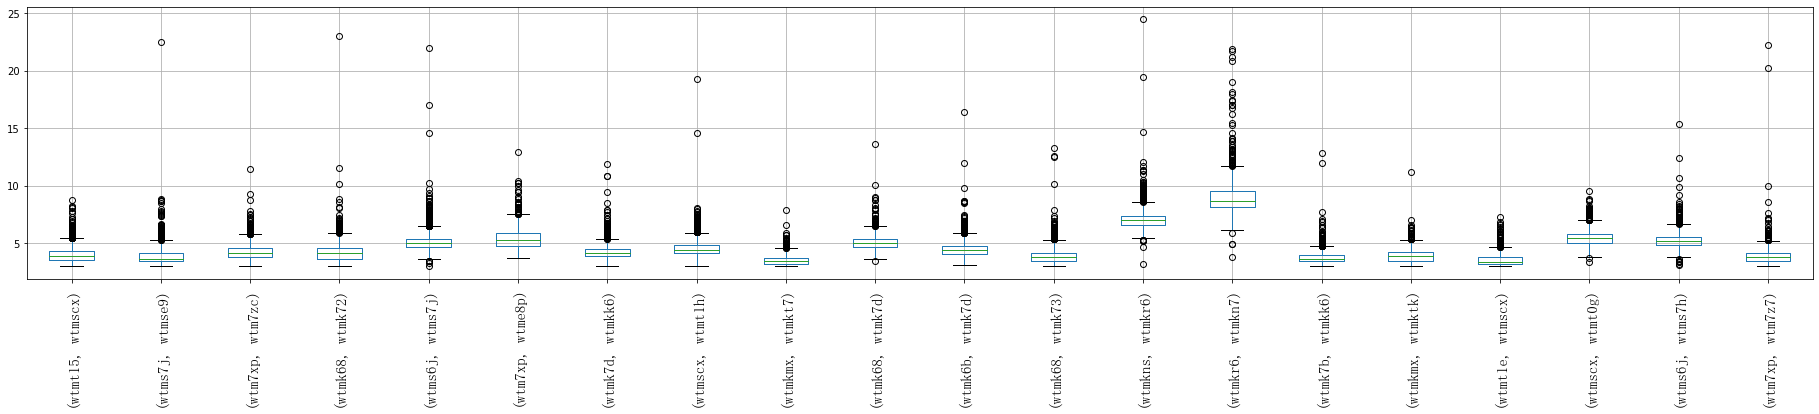

In [112]:
from matplotlib.font_manager import FontProperties 
from matplotlib import pyplot as plt
import numpy as np
font = FontProperties(fname=r"C:\\Windows\\Fonts\\simsun.ttc", size=15) 

top_df.describe().to_excel("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\top_20_describe.xls")


top_df = top_df[top_df < 25]

plt.figure(figsize=(32,5))
# 解决标注乱码的问题
ax = top_df.boxplot(rot='90')
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 


In [114]:
index_list = top_df.T.index.to_list()

print(index_list)

[('wtmt15', 'wtmscx'), ('wtms7j', 'wtmse9'), ('wtm7xp', 'wtm7zc'), ('wtmk68', 'wtmk72'), ('wtms6j', 'wtms7j'), ('wtm7xp', 'wtme8p'), ('wtmk7d', 'wtmkk6'), ('wtmscx', 'wtmt1h'), ('wtmkmx', 'wtmkt7'), ('wtmk68', 'wtmk7d'), ('wtmk6b', 'wtmk7d'), ('wtmk68', 'wtmk73'), ('wtmkns', 'wtmkr6'), ('wtmkr6', 'wtmkn7'), ('wtmk7b', 'wtmkk6'), ('wtmkmx', 'wtmktk'), ('wtmt1e', 'wtmscx'), ('wtmscx', 'wtmt0g'), ('wtms6j', 'wtms7h'), ('wtm7xp', 'wtm7z7')]


In [115]:
# ## 按照出发地和目的地进行group
# import geohash

# col_name = ods_july_0724.columns.values.tolist()

# ods_july_0724_ = ods_july_0724[ods_july_0724['zke_lch_jyqk'] > 3]

# each_group = ods_july_0724_.groupby(['cl_cfa_geohash_short', 'cl_dd_geohash_short']).agg('count').sort_values('did_bh') # groupby(['cl_cfa_geohash_short', 'cl_dd_geohash_short'])
# # print(each_group['did_bh'].describe())

all_colors = {}

import random

def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color


for i in index_list:
    random_color = randomcolor()
    if random_color not in all_colors:
        all_colors[i[0]] = (random_color)
# print(all_colors)

def getColor(geohash_val):
    if geohash_val not in all_colors.keys():
        random_color = randomcolor()
        all_colors[geohash_val] = (random_color)

    return all_colors[geohash_val]



In [83]:
from constrast_between import my_map_compare


In [116]:
import geohash
from haversine import haversine 
import Amap_router

def draw_certain_(index_list, draw_nums, save_path = "hello", asc = False): 
    '''
    @params index_list [('wtms65', 'wtms6j'), ('wtmebq', 'wtms02'), ... ]
    '''
    # 画热度最高的十条路线
    
    top_ten_name = index_list

    my_map_compare_ = my_map_compare([120.333, 30.333], [120.333, 30.333])

    for i, cur_name in enumerate(top_ten_name):
        # geohash_arr = cur_name # i
        src_pos_area = geohash.decode(cur_name[0])
        src_pos_area = [src_pos_area[1], src_pos_area[0]]

        dst_pos_area = geohash.decode(cur_name[1])
        dst_pos_area = [dst_pos_area[1], dst_pos_area[0]]

        real_dist_center = haversine(src_pos_area, dst_pos_area)

        my_map_compare_.draw_geohash(cur_name[0], color=getColor(cur_name[0]))
        my_map_compare_.draw_geohash(cur_name[1], color=getColor(cur_name[1]))

        ret_router, ret_dist = Amap_router.get_route(src_pos_area, dst_pos_area) # color_router = all_colors[i], 
        my_map_compare_.draw_route(src_pos_area, dst_pos_area, ret_router, color_router = getColor(cur_name[0]), start_tip = cur_name[0] + "_start", end_tip = cur_name[1] + "_end", router_tip = str(i) + "_" + cur_name[0] + "_" + cur_name[1])
        
        # break
    my_map_compare_.save_(save_path)

draw_certain_(index_list, 20, save_path = "hello_", asc = False)


In [ ]:
print(each_group['did_bh'].describe())

In [ ]:
# # each_group.groupby('did_bh')[''].plot()

# each_group_filtered = each_group[each_group["did_bh"] > 100]

In [ ]:
geohash.bbox()

In [ ]:
print(len(all_indexes)) # , all_indexes)

In [ ]:
# # 筛选相应的记录
# high_frq = pd.DataFrame()

# for i in all_indexes:
#     plus = ods_july_0724[(ods_july_0724['cl_cfa_geohash_short'] == i[0]) & (ods_july_0724['cl_dd_geohash_short'] == i[1])]

#     if (len(high_frq.columns.values)) == 0:
#         high_frq = plus # ods_july_0724[(ods_july_0724['cl_cfa_geohash_short'] == i[0]) & (ods_july_0724['cl_dd_geohash_short'] == i[1])]
        
#     else:
#         high_frq = pd.concat([high_frq, plus])
    
#     # break
# print(len(high_frq.index.values))
# print(high_frq)


In [ ]:
import folium
from folium import plugins

san_map = folium.Map(
        location=[30.212403, 120.224699], 
        zoom_start=16,
        tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=7&x={x}&y={y}&z={z}', # 高德街道图
        attr='default'
    )

# marker_cluster = plugins.MarkerCluster().add_to(san_map)
# for per_point in cur_all_points:
#     folium.Marker(location=[per_point[0], per_point[1]],tooltip="center",color='#3388ff').add_to(san_map)

# folium.PolyLine(cur_all_points,color='#3388ff').add_to(san_map)


In [ ]:
# all_cnts = []
# for i in range(0, len(all_colors)):
#     all_cnts.append(0)
    
# for i, r in ods_july_empty.iterrows():
#     Lat = r['cl_cfa_dqwd']
#     Lon = r['cl_cfa_dqjd']

#     cur_geohash = r['cl_cfa_geohash']

#     if cur_geohash not in all_indexes:
#         continue
    
    
#     color_index = all_indexes.index(cur_geohash)
#     if all_cnts[color_index] > 10:
#         continue
#     else:
#         all_cnts[color_index] += 1
    
#     color = all_colors[color_index]

#     print(color, color_index)

#     folium.Circle(radius=10, location=[Lat, Lon],tooltip=cur_geohash,color=color, fill=True).add_to(san_map)
#     # data = geohash.encode(Lon, Lat,precision=6)
#     # print(data)

#     # break



# san_map.save('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\test.html')



In [ ]:
print(type(all_indexes[0][0]))

In [20]:
all_sets = {}
all_sets_did = {}
# 收集各个对的里程数与订单号

ods_july_0724_filtered = ods_july_0724[ods_july_0724['total_sum'] > 500]

for i, r in ods_july_0724_filtered.iterrows():
   
    sets_name = r['cl_cfa_geohash_short'] + '_' + r['cl_dd_geohash_short']

    # print(all_sets.keys())
    if sets_name in all_sets.keys():
        all_sets[sets_name].append(r['zke_lch_jyqk'])
        all_sets_did[sets_name].append(r['did_bh'])
    else:
        sets_reverse_name = r['cl_dd_geohash_short'] + "_" + r['cl_cfa_geohash_short']
        if sets_reverse_name in all_sets.keys():
            all_sets[sets_reverse_name].append(r['zke_lch_jyqk'])
            all_sets_did[sets_reverse_name].append(r['did_bh'])
        else:
            all_sets[sets_name] = []
            all_sets[sets_name].append(r['zke_lch_jyqk'])

            all_sets_did[sets_name] = []
            all_sets_did[sets_name].append(r['did_bh'])
    
# print(all_sets)

In [ ]:
# # print(all_sets_did['wtms77_wtms7j'])
# import Amap_router
# import geohash
# from haversine import haversine
# # from constrast_between import my_map_compare

# my_map_compare_ = my_map_compare([120, 30], [120, 30])
# aver_times = 5
# # 真实距离
# all_sets_did_real_dist = {}
# for id_, i in enumerate(all_sets_did.keys()):
#     # print(i)
#     cur_times = 0
#     sum_dist = 0
#     # for j in all_sets_did[i]:
#     #     print(j)

#     #     if cur_times > aver_times:
#     #         break

#     #     cur_times += 1

#     #     cur_record = ods_july_0724[ods_july_0724['did_bh'] == j]
#     #     src_pos = [cur_record['cl_cfa_dqjd'].values[0], cur_record['cl_cfa_dqwd'].values[0]]
#     #     dst_pos = [cur_record['cl_dd_dqjd'].values[0], cur_record['cl_dd_dqwd'].values[0]]
        
#     #     #ret_router, ret_dis = Amap_router.get_route(src_pos, dst_pos)
#     #     # my_map_compare_.draw_route(src_pos, dst_pos, ret_router)
#     #     # my_map_compare_.add_point(src_pos, "#ffffff")
#     #     # my_map_compare_.add_point(dst_pos, "#ffffff")

#     #     print(src_pos, dst_pos, ret_dis, cur_record['zke_lch_jyqk'].values[0])
#     #     sum_dist += ret_dis
#     #     # break
#     # 逆地理哈希，算两点距离
#     geohash_arr = i.split("_")
    
#     src_pos_area = geohash.decode(geohash_arr[0])
#     src_pos_area = [src_pos_area[1], src_pos_area[0]]

#     dst_pos_area = geohash.decode(geohash_arr[1])
#     dst_pos_area = [dst_pos_area[1], dst_pos_area[0]]


#     ret_router, ret_dis = Amap_router.get_route(src_pos_area, dst_pos_area)
#     print(type(ret_router), type(ret_router[0]), ret_router)
#     real_dist_center = haversine(src_pos_area, dst_pos_area)
#     all_sets_did_real_dist[i] = real_dist_center # sum_dist / cur_times
#     my_map_compare_.add_point(src_pos_area, "#224466")
#     my_map_compare_.add_point(dst_pos_area, "#ff7733")

#     # print(i, all_sets_did_real_dist[i], src_pos_area, dst_pos_area)
#     bbox_ = geohash.bbox(geohash_arr[0])

    
#     point = np.array([np.array([bbox_['s'],bbox_['e']]), 
#                       np.array([bbox_['n'],bbox_['e']]),
#                       np.array([bbox_['n'],bbox_['w']]), 
#                       np.array([bbox_['s'],bbox_['w']]),
#                       np.array([bbox_['s'],bbox_['e']])])
#     print(all_colors[id_], src_pos_area)
    
#     my_map_compare_.draw_polygon( point, color = all_colors[id_])

#     for j in point:
#         my_map_compare_.add_point(j, "#ff7733")
#     print(point)
#     break
# my_map_compare_.save_("hello")

In [21]:
# 转成长度矩阵？
all_sets_df = pd.DataFrame.from_dict(all_sets, orient='index').T



print(len(all_sets_df))

max_len = 0
max_len_i = 0

for i, cur_set in enumerate(all_sets.values()):
    if i == 0:
        all_times = pd.Series(len(cur_set))
    else:
        more_df = pd.Series(len(cur_set))
        all_times = pd.concat([all_times, more_df])

    if max_len < len(cur_set):
        max_len = len(cur_set)
        max_len_i = i

print(max_len, max_len_i)


2929
2929 23


In [24]:
print(all_sets_df)

      wtm7xp_wtm7wm  wtm7zs_wtmkr6  wtmkmx_wtmktk  wtm7z7_wtm7xp  \
0              4.73          12.65           4.45           3.42   
1              4.58          11.56           3.30           2.69   
2              4.08          11.49           3.40           3.13   
3              4.77          11.30           4.20           4.19   
4              4.38          12.36           4.30           2.79   
...             ...            ...            ...            ...   
2924            NaN            NaN            NaN            NaN   
2925            NaN            NaN            NaN            NaN   
2926            NaN            NaN            NaN            NaN   
2927            NaN            NaN            NaN            NaN   
2928            NaN            NaN            NaN            NaN   

      wtmknm_wtmkr6  wtmknx_wtmkr6  wtmebr_wtmsh8  wtmkpw_wtmkrd  \
0              7.24           8.90          19.42           5.22   
1              7.08           5.49          19.

In [28]:
all_sets_df_filter = all_sets_df[all_sets_df < 75]
print(all_sets_df_filter)

      wtm7xp_wtm7wm  wtm7zs_wtmkr6  wtmkmx_wtmktk  wtm7z7_wtm7xp  \
0              4.73          12.65           4.45           3.42   
1              4.58          11.56           3.30           2.69   
2              4.08          11.49           3.40           3.13   
3              4.77          11.30           4.20           4.19   
4              4.38          12.36           4.30           2.79   
...             ...            ...            ...            ...   
2924            NaN            NaN            NaN            NaN   
2925            NaN            NaN            NaN            NaN   
2926            NaN            NaN            NaN            NaN   
2927            NaN            NaN            NaN            NaN   
2928            NaN            NaN            NaN            NaN   

      wtmknm_wtmkr6  wtmknx_wtmkr6  wtmebr_wtmsh8  wtmkpw_wtmkrd  \
0              7.24           8.90          19.42           5.22   
1              7.08           5.49          19.

In [ ]:
print(list(all_sets.keys()))
# all_sets['wtmkjvve_wtmknk90']

for i, r in high_frq.iterrows():
    if r['cl_cfa_geohash_short'] == 'wtms6v' and r['cl_dd_geohash'] == 'wtms6t':
        print(r['cl_cfa_dqjd'], r['cl_cfa_dqwd'])
    elif r['cl_cfa_geohash_short'] == 'wtms6t' and r['cl_dd_geohash'] == 'wtms6v':
        print(r)


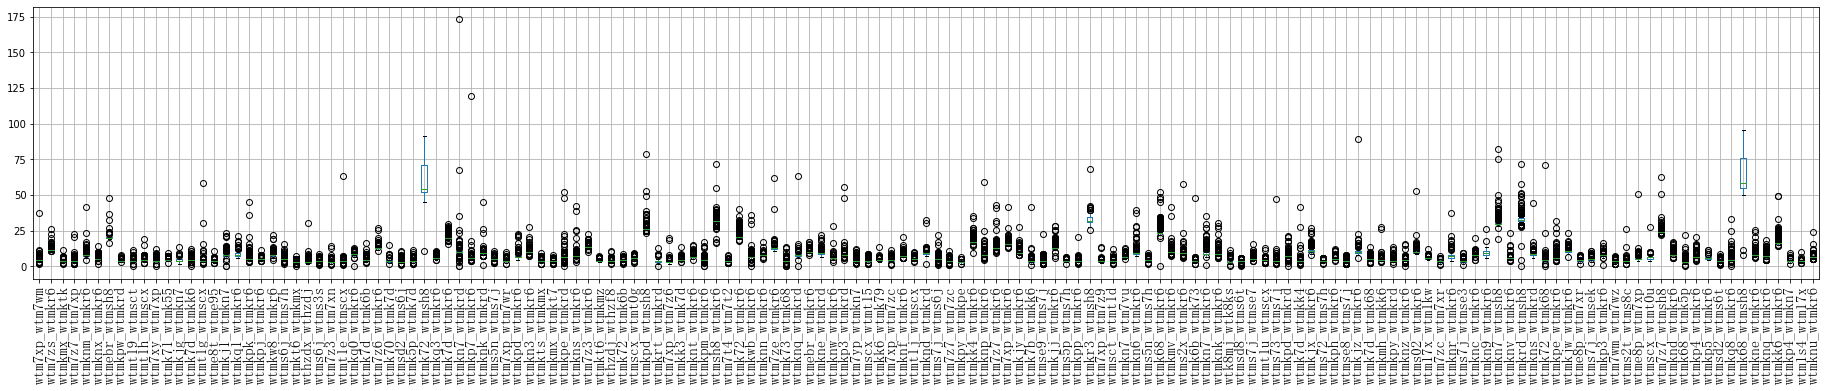

In [26]:
# print(all_sets_df)
from matplotlib.font_manager import FontProperties 
from matplotlib import pyplot as plt

font = FontProperties(fname=r"C:\\Windows\\Fonts\\simsun.ttc", size=15) 



plt.figure(figsize=(32,5))
# 解决标注乱码的问题
ax = all_sets_df_filter.boxplot(rot='90')
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 



In [ ]:
print(all_sets['wtmkr1_wtmkr6'].index(max(all_sets['wtmkr1_wtmkr6'])))
print(all_sets['wtmkr1_wtmkr6'][937])
print(all_sets_did['wtmkr1_wtmkr6'][937])
cur_record = ods_july_0724[ods_july_0724['did_bh'] == 17737648778807]
print(cur_record)

src_pos = [cur_record['cl_cfa_dqjd'].values[0], cur_record['cl_cfa_dqwd'].values[0]]
dst_pos = [cur_record['cl_dd_dqjd'].values[0], cur_record['cl_dd_dqwd'].values[0]]

my_map_compare_ = my_map_compare(src_pos, dst_pos)
ret_router, ret_dist = Amap_router.get_route(src_pos, dst_pos)
my_map_compare_.draw_route(src_pos, dst_pos, ret_router)
my_map_compare_.save_("hello")

In [ ]:

all_sets_did_real_dist_df = pd.DataFrame.from_dict(all_sets_did_real_dist, orient = 'index').T
print(all_sets_did_real_dist_df)

ax = all_sets_did_real_dist_df.plot(rot='90',kind = 'box',legend=False, figsize=(28,5))
# 解决标注乱码的问题
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 

